In [1]:
%cd ..

/mnt/nfs/clustersw/Debian/bookworm/jupyterhub/1.0/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/nfs/scistore16/edelgrp/fzimin/depth-poset


In [2]:
import os

import numpy as np
import pandas as pd
import pickle as pkl

#from tqdm.notebook import tqdm
from tqdm import tqdm

# Load and Format the Data

In [3]:
# define file paths
directory = "results/scores-on-random-alpha-complexes"
paths = np.sort([f'{directory}/{f}' for f in os.listdir(directory)])

# load them
ls = []
for path in tqdm(paths, total=len(paths)):
    with open(path, 'rb') as file:
        ls.append(pkl.load(file))

100%|██████████| 445/445 [00:00<00:00, 739.36it/s]


<Axes: ylabel='n,dim'>

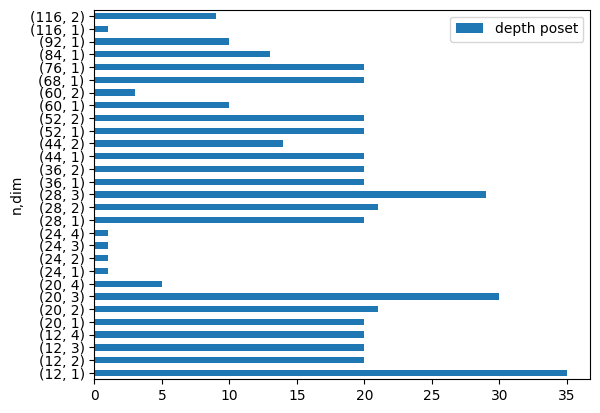

In [4]:
df_cases = pd.DataFrame(ls)

df_cases[['n', 'dim', 'depth poset']].groupby(['n', 'dim']).count().plot(kind='barh')

In [5]:
df_poset_scores = [pd.DataFrame(i['poset scores']) for i in ls]
for i in range(len(df_poset_scores)):
    df_poset_scores[i].insert(0, 'index', value=i)
df_poset_scores = pd.concat(df_poset_scores)

print(f'df_poset_scores.shape = {df_poset_scores.shape}')
df_poset_scores.head()

df_poset_scores.shape = (1257, 9)


,index,object,number_of_nodes,number_of_minimal_nodes,number_of_maximal_nodes,height,width,minimum_maximal_chain,avarage_maximal_chain
0,0,full,63,51,42,3,51,1,1.688525
1,0,subposet dim=0,23,13,6,3,13,1,2.652174
2,0,subposet dim=1,40,38,36,1,38,1,1.105263
0,1,full,190,174,154,6,174,1,1.357955
1,1,subposet dim=0,23,14,4,6,14,1,3.533333


In [6]:
df_node_scores = [pd.DataFrame(i['node scores']) for i in ls]
for i in range(len(df_node_scores)):
    df_node_scores[i].insert(0, 'index', value=i)
df_node_scores = pd.concat(df_node_scores)

print(f'df_node_scores.shape = {df_node_scores.shape}')
df_node_scores.head()

df_node_scores.shape = (13890, 10)


,index,object,node,incomparable_number,incestors_number,incestors_height,incestors_width,successors_number,successors_height,successors_width
0,0,full,"ShallowPair([0.0000, 0.0133], dim=0)",58,0,0,0,4,1,3
1,0,subposet dim=0,"ShallowPair([0.0000, 0.0133], dim=0)",18,0,0,0,4,1,3
2,0,full,"ShallowPair([0.0000, 0.0011], dim=0)",59,2,1,1,1,0,1
3,0,subposet dim=0,"ShallowPair([0.0000, 0.0011], dim=0)",19,2,1,1,1,0,1
4,0,full,"ShallowPair([0.0000, 0.0150], dim=0)",52,0,0,0,10,1,6


In [7]:
df_node_scores[['index', 'object', 'incomparable_number', 'incestors_number',
                'incestors_height', 'incestors_width', 'successors_number',
                'successors_height', 'successors_width']].groupby(['index', 'object']).agg(['min', 'max'])

incomparable_number      incestors_number      \
                                     min  max              min max   
index object                                                         
0     full                            52   62                0   4   
      subposet dim=0                  12   21                0   4   
      subposet dim=1                  38   39                0   1   
1     full                           176  189                0   2   
      subposet dim=0                   9   22                0   2   
...                                  ...  ...              ...  ..   
442   subposet dim=1                  97  107                0   3   
443   full                            65   80                1   5   
      subposet dim=0                  65   80                1   5   
444   full                            42   81                0   4   
      subposet dim=0                  42   81                0   4   

                     incestors_height     incestors_width      \
                                  min max             min max   
index object                                                    
0     full                          0   1               0   3   
      subposet dim=0                0   1               0   3   
      subposet dim=1                0   0               0   1   
1     full                          0   1               0   1   
      subposet dim=0                0   1               0   1   
...                               ...  ..             ...  ..   
442   subposet dim=1                0   2               0   1   
443   full                          0   4               1   2   
      subposet dim=0                0   4               1   2   
444   full                          0   3               0   1   
      subposet dim=0                0   3               0   1   

                     successors_number     successors_height      \
                                   min max               min max   
index object                                                       
0     full                           0  10                 0   1   
      subposet dim=0                 0  10                 0   1   
      subposet dim=1                 0   0                 0   0   
1     full                           0  12                 0   4   
      subposet dim=0                 0  12                 0   4   
...                                ...  ..               ...  ..   
442   subposet dim=1                 0   9                 0   1   
443   full                           0  16                 0   3   
      subposet dim=0                 0  16                 0   3   
444   full                           0  40                 0   4   
      subposet dim=0                 0  40                 0   4   

                     successors_width      
                                  min max  
index object                               
0     full                          0   6  
      subposet dim=0                0   6  
      subposet dim=1                0   0  
1     full                          0   7  
      subposet dim=0                0   7  
...                               ...  ..  
442   subposet dim=1                0   7  
443   full                          0   8  
      subposet dim=0                0   8  
444   full                          0  23  
      subposet dim=0                0  23  

[1232 rows x 14 columns]